In [1]:
from getpass import getpass
from arcgis.gis import GIS
import arcgis.features
import pandas as pd
from arcgis.geometry import Polygon
# Need to do conda install -c esri arcgis, which requires Python 3.8
# Run notebook with kernel created with:
# python -m ipykernel install --user --name arcgis --display-name "Python 3.8 (ArcGIS)"
# On Apple Silicon need Rosetta 2 emulator (see https://joelmccune.com/install-arcgis-python-api-on-apple-silicon/)
# and downgrade urllib3=1.26.0 until fall update of arcgis package
# TODO: update dependencies file for above

# Authenticate with ArcGIS Online
username = getpass("Entter ArcGIS username: ")

password = getpass("Enter ArcGIS password: ")

gis = GIS("https://www.arcgis.com", username, password)

# Define coordinates and area of interest
lat = 40.322965
lon = -74.728754
distance_in_miles = 0.25
# Convert distance to degrees (approx)
distance_in_degrees = distance_in_miles / 69.0 # 69 miles per degree at equator ... less at higher latitudes

# Define boundary square around the coordinates
min_lat = lat - distance_in_degrees
max_lat = lat + distance_in_degrees
min_lon = lon - distance_in_degrees
max_lon = lon + distance_in_degrees

# Polygon representing the area of interest
# https://developers.arcgis.com/documentation/common-data-types/geometry-objects.htm#:~:text=JSON%20examples-,A%202D%20polygon,-%7B%0A%20%20%22rings%22%3A%20%5B%0A%20%20%20%20%5B%0A%20%20%20%20%20%20%5B%2D97.06138%2C32.837%5D%2C%0A%20%20%20%20%20%20%5B%2D97.06133%2C32.836
area_of_interest = Polygon({
    "rings": [[[min_lon, min_lat], 
               [min_lon, max_lat], 
               [max_lon, max_lat], 
               [max_lon, min_lat], 
               [min_lon, min_lat]]],
    "spatialReference": {"wkid": 4326}
})



/opt/homebrew/Caskroom/miniforge/base/envs/mapping/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Web map ID fo https://www.arcgis.com/home/search.html?restrict=false&sortField=relevance&sortOrder=desc&searchTerm=2705228b2b154d0a906ef7a54e533fac#content
webmap_id = "2705228b2b154d0a906ef7a54e533fac"

# Access item by ID
webmap_item = gis.content.get(webmap_id)

# https://developers.arcgis.com/python/guide/managing-your-content/
webmap_data = webmap_item.get_data()

webmap_data.keys()

dict_keys(['operationalLayers', 'baseMap', 'authoringApp', 'authoringAppVersion', 'initialState', 'spatialReference', 'version'])

In [3]:
webmap_data["operationalLayers"]

[{'id': '188f84d8736-layer-2',
  'opacity': 0.5,
  'title': 'Land Use Land Cover of New Jersey 2015 - Land Use 2015',
  'url': 'https://mapsdep.nj.gov/arcgis/rest/services/Features/Land_lu/MapServer/13',
  'itemId': '2e7d9704d28c420a85777c37ee4636ab',
  'layerType': 'ArcGISFeatureLayer',
  'popupInfo': {'popupElements': [{'type': 'fields'},
    {'type': 'attachments', 'displayType': 'auto'}],
   'showAttachments': True,
   'fieldInfos': [{'fieldName': 'OBJECTID',
     'isEditable': False,
     'label': 'OBJECTID',
     'visible': False},
    {'fieldName': 'ACRES',
     'format': {'digitSeparator': True, 'places': 2},
     'isEditable': True,
     'label': 'ACRES',
     'visible': True},
    {'fieldName': 'APPROVED',
     'isEditable': True,
     'label': 'APPROVED',
     'visible': True},
    {'fieldName': 'AREASQKM',
     'format': {'digitSeparator': True, 'places': 2},
     'isEditable': True,
     'label': 'Area (SQ KM)',
     'visible': True},
    {'fieldName': 'CHANGE15',
     'fo

In [4]:
# https://developers.arcgis.com/web-map-specification/objects/operationalLayers/
operational_layers = webmap_data["operationalLayers"]
print(f"Found {len(operational_layers)} operational layers.")
    
# Loop through each operational layer
print(f"Layer Name: {operational_layers[0].get('title')}, URL: {operational_layers[0].get('url')}")



Found 1 operational layers.
Layer Name: Land Use Land Cover of New Jersey 2015 - Land Use 2015, URL: https://mapsdep.nj.gov/arcgis/rest/services/Features/Land_lu/MapServer/13


In [5]:
# URL of the operational layer
layer_url = operational_layers[0].get('url')

# Access the layer
# https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html
layer = arcgis.features.FeatureLayer(layer_url)

# Query the layer for features that intersect with the area of interest
features = layer.query(geometry_filter=arcgis.geometry.filters.intersects(area_of_interest))

# Check features
print(f"Found {len(features)} features in the layer.")

# View the feature attributes
for feature in features:
    print(feature.attributes)


Found 18 features in the layer.
{'OBJECTID': 371923, 'ACRES': 2.43043655, 'LU15': 1130, 'LABEL15': 'RESIDENTIAL, SINGLE UNIT, LOW DENSITY', 'TYPE15': 'URBAN', 'IS15': 12.82607141, 'ISACRES15': 0.31172953000000003, 'DV15': 0, 'LU12': 1130, 'LABEL12': 'RESIDENTIAL, SINGLE UNIT, LOW DENSITY', 'TYPE12': 'URBAN', 'IS12': 10, 'ISACRES12': 0.24304366, 'DV12': 0, 'CHANGE15': 0, 'ISCHANGE15': 1, 'HU8': '02040105', 'STATUS': 'DRAFT', 'APPROVED': '01/28/19', 'COMID': None, 'PERMANENT_IDENTIFIER': None, 'FDATE': None, 'RESOLUTION': None, 'GNIS_ID': None, 'GNIS_NAME': None, 'AREASQKM': None, 'ELEVATION': None, 'REACHCODE': None, 'FTYPE': None, 'FCODE': None, 'FTYPE_DESCRIPTION': None, 'FCODE_DESCRIPTION': None, 'FTYPE_DISPLAY': None, 'NHD_FEATURECLASS': None, 'WATERBODY_NAME': None, 'FEATURE_ID': None, 'FEATURE_NAME': None, 'FEATURE_CLASS': None, 'LEVELELEV': None, 'GLOBALID': '{626BFC03-091E-4DB2-B848-74FD09E020E4}', 'SHAPE_Length': 1291.7361634679703, 'SHAPE_Area': 105869.3928495188, 'CREATED_USE

In [6]:
# Store in a dataframe
intersection_data = pd.DataFrame(columns=['Object_ID', 'Region', 'Acres', 'Area (sq meters)'])

# Loop through the features
# TODO: get only area within the area of interest and combine like regions
for feature in features:
    # Extract the object ID, region label, and area
    object_id = feature.attributes['OBJECTID']
    region_label = feature.attributes['LABEL15']
    region_acres = feature.attributes['ACRES']
    region_area = feature.attributes['SHAPE_Area']
    intersection_data.loc[len(intersection_data)] = {'Object_ID': object_id, 'Region': region_label, 'Acres': region_acres, 'Area (sq meters)': region_area}
    #intersection_data = intersection_data.append({'Region': region_label, 'Area (sq meters)': region_area}, ignore_index=True)

print(intersection_data)


    Object_ID                                             Region      Acres  \
0      371923              RESIDENTIAL, SINGLE UNIT, LOW DENSITY   2.430437   
1      376716                    RESIDENTIAL, RURAL, SINGLE UNIT   8.358990   
2      376735                    RESIDENTIAL, RURAL, SINGLE UNIT  30.991083   
3      376744                    RESIDENTIAL, RURAL, SINGLE UNIT  12.182622   
4      406231                           CROPLAND AND PASTURELAND  76.803373   
5      409391                   AGRICULTURAL WETLANDS (MODIFIED)   1.034468   
6      409392                   AGRICULTURAL WETLANDS (MODIFIED)   2.753612   
7      414024            DECIDUOUS FOREST (10-50% CROWN CLOSURE)   3.502502   
8      419968              DECIDUOUS FOREST (>50% CROWN CLOSURE)   2.482278   
9      419983              DECIDUOUS FOREST (>50% CROWN CLOSURE)  14.104962   
10     427126                                         PLANTATION   3.331138   
11     427801  MIXED FOREST (>50% CONIFEROUS WITH >5

Try the `overlaps` filter. Will check the object IDs online to see how these compare to what we can see.

Object IDs don't show up in web interface (neither does the square meter Area estimate, which is a bit high). However, it seems that `overlaps` does not count land use segments completely contained within `area_of_interest`. Comparing the differences could then be used to tell us which should be counted in full.

In [7]:
# Query the layer for features that overlay the area of interest
features = layer.query(geometry_filter=arcgis.geometry.filters.overlaps(area_of_interest))

# Check features
print(f"Found {len(features)} features in the layer.")

# View the feature attributes
for feature in features:
    print(feature.attributes)

Found 11 features in the layer.
{'OBJECTID': 376716, 'ACRES': 8.35899046, 'LU15': 1140, 'LABEL15': 'RESIDENTIAL, RURAL, SINGLE UNIT', 'TYPE15': 'URBAN', 'IS15': 13.57034977, 'ISACRES15': 1.13434424, 'DV15': 0, 'LU12': 1140, 'LABEL12': 'RESIDENTIAL, RURAL, SINGLE UNIT', 'TYPE12': 'URBAN', 'IS12': 15, 'ISACRES12': 1.25384857, 'DV12': 0, 'CHANGE15': 0, 'ISCHANGE15': 0, 'HU8': '02040105', 'STATUS': 'DRAFT', 'APPROVED': '01/28/19', 'COMID': None, 'PERMANENT_IDENTIFIER': None, 'FDATE': None, 'RESOLUTION': None, 'GNIS_ID': None, 'GNIS_NAME': None, 'AREASQKM': None, 'ELEVATION': None, 'REACHCODE': None, 'FTYPE': None, 'FCODE': None, 'FTYPE_DESCRIPTION': None, 'FCODE_DESCRIPTION': None, 'FTYPE_DISPLAY': None, 'NHD_FEATURECLASS': None, 'WATERBODY_NAME': None, 'FEATURE_ID': None, 'FEATURE_NAME': None, 'FEATURE_CLASS': None, 'LEVELELEV': None, 'GLOBALID': '{62E4507C-7C38-4E3E-A035-74A7A2FD6CAF}', 'SHAPE_Length': 3555.2220169003554, 'SHAPE_Area': 364116.1679749123, 'CREATED_USER': 'DEP', 'CREATED_D

What will the feature analysis `summarize_within` give? This spacial analysis tool should provide the desired area, but it requires an ArcGIS Online account under an organization which we may not have.

In [ ]:
# This spatial analysis tool *should* do what we want, however it requires an ArcGIS Online account under an organization
for feature in features:
    print(arcgis.features.analysis.summarize_within(sum_within_layer = area_of_interest, summary_layer = layer, group_by_field = 'LABEL15'))

Alternate approach Matt says got intersection geometry

In [9]:
from arcgis.geometry import project

# Check spatial reference of AOI
aoi_spatial_ref = area_of_interest.spatial_reference['wkid']

# Get geom of first feature
feature_set = layer.query(geometry_filter=arcgis.geometry.filters.intersects(area_of_interest))
feature = feature_set.features[0]
feature_geometry = feature.geometry
print(f"Feature_Geo_1: {feature_geometry}")
print(f"AOI_Geo_1: {area_of_interest}")
# Check spatial reference of feature
feature_spatial_ref = feature_geometry['spatialReference']['wkid']

# https://developers.arcgis.com/python/api-reference/arcgis.geometry.html#project
# Match spatial refs
feature_geometry = project(geometries=[feature_geometry],
                            in_sr=feature_spatial_ref,
                            out_sr=aoi_spatial_ref)[0]
print(f"Feature_Geo_2: {feature_geometry}")
print(f"AOI_Geo_2: {area_of_interest}")
#from arcgis.geometry import intersect

spatial_ref = aoi_spatial_ref # {'wkid': 4326}

# Get intersection
# https://developers.arcgis.com/python/api-reference/arcgis.geometry.html#intersect
intersection = arcgis.geometry.intersect(spatial_ref, geometries = [area_of_interest], geometry = feature_geometry)
print(f"Intersection: {intersection}")

Feature_Geo_1: {'rings': [[[-8318737.041446664, 4912503.991715548], [-8318788.951590038, 4912501.073009888], [-8318819.649474512, 4912502.621234108], [-8318825.498053442, 4912535.14813234], [-8318831.723243505, 4912617.172253312], [-8318831.952788128, 4912622.47375669], [-8318694.735535496, 4912632.223729978], [-8318687.005670803, 4912506.804836614], [-8318692.148349541, 4912506.515654499], [-8318737.041446664, 4912503.991715548]]], 'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}
AOI_Geo_1: {'rings': [[[-74.73237718840579, 40.31934181159421], [-74.73237718840579, 40.3265881884058], [-74.7251308115942, 40.3265881884058], [-74.7251308115942, 40.31934181159421], [-74.73237718840579, 40.31934181159421]]], 'spatialReference': {'wkid': 4326}}
Feature_Geo_2: {'rings': [[[-74.7284862886083, 40.319661903211625], [-74.7289526058689, 40.3196419125306], [-74.7292283697965, 40.319652516420874], [-74.72928090866421, 40.31987529841405], [-74.72933682968898, 40.320437092147365], [-74.7293388

Looks like this should be workable. 

This intersection should refer to `Object ID: 371923; RESIDENTIAL, SINGLE UNIT, LOW DENSITY; 2.430437 acres`, so we should be able to cylce through all intersected features like this to calculate area.

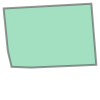

In [10]:
intersection[0]

In [11]:
test_area = arcgis.geometry.areas_and_lengths(polygons = intersection[0], length_unit= 9001, area_unit=9001, calculation_type='preserveShape', spatial_ref = spatial_ref)
test_area

{'areas': [9837.50575620192], 'lengths': [393.75982037705984]}

`geodesic`: {'areas': [9837.519435710936], 'lengths': [393.7598203745224]}

`planar`: {'areas': [12887.976266627964], 'lengths': [457.97848215130557]}

`preserveShape`: {'areas': [9837.50575620192], 'lengths': [393.75982037705984]}

In [12]:
test_area['areas']

[9837.50575620192]

We have area. Now let's get a list for all the features in our `area_of_interest`.

In [14]:
#from arcgis.geometry import project

# Check spatial reference of AOI
aoi_spatial_ref = area_of_interest.spatial_reference['wkid']

feature_areas = []
# Get geom of first feature
feature_set = layer.query(geometry_filter=arcgis.geometry.filters.intersects(area_of_interest))
for feature in feature_set.features:
    feature_geometry = feature.geometry
    region_label = feature.attributes['LABEL15']
    feature_spatial_ref = feature_geometry['spatialReference']['wkid']
    # https://developers.arcgis.com/python/api-reference/arcgis.geometry.html#project
    # Match spatial refs
    feature_geometry = project(geometries=[feature_geometry],
                            in_sr=feature_spatial_ref,
                            out_sr=aoi_spatial_ref)[0]
    spatial_ref = aoi_spatial_ref # {'wkid': 4326}

    # Get intersection
    # https://developers.arcgis.com/python/api-reference/arcgis.geometry.html#intersect
    intersection = arcgis.geometry.intersect(spatial_ref, [area_of_interest], feature_geometry)
    area = arcgis.geometry.areas_and_lengths(polygons = intersection[0], 
                                             length_unit= 9001, 
                                             area_unit=9001, 
                                             calculation_type='geodesic', 
                                             spatial_ref = spatial_ref)
    feature_areas.append((region_label, area['areas']))

feature_areas


[('RESIDENTIAL, SINGLE UNIT, LOW DENSITY', [9837.519435710936]),
 ('RESIDENTIAL, RURAL, SINGLE UNIT', [19214.545632824284]),
 ('RESIDENTIAL, RURAL, SINGLE UNIT', [9245.643083689602]),
 ('RESIDENTIAL, RURAL, SINGLE UNIT', [2414.091451106678]),
 ('CROPLAND AND PASTURELAND', [270425.88118461665]),
 ('AGRICULTURAL WETLANDS (MODIFIED)', [4187.142177020247]),
 ('AGRICULTURAL WETLANDS (MODIFIED)', [11145.591614426075]),
 ('DECIDUOUS FOREST (10-50% CROWN CLOSURE)', [1314.8407731290363]),
 ('DECIDUOUS FOREST (>50% CROWN CLOSURE)', [3879.70756537234]),
 ('DECIDUOUS FOREST (>50% CROWN CLOSURE)', [10301.133011833832]),
 ('PLANTATION', [3118.2726111932284]),
 ('MIXED FOREST (>50% CONIFEROUS WITH >50% CROWN CLOSURE)',
  [2389.5981208965372]),
 ('MIXED DECIDUOUS/CONIFEROUS BRUSH/SHRUBLAND', [111004.5367850509]),
 ('DECIDUOUS WOODED WETLANDS', [315.45317639807905]),
 ('DECIDUOUS WOODED WETLANDS', [293.9639848545341]),
 ('DECIDUOUS WOODED WETLANDS', [1065.7152863120186]),
 ('DECIDUOUS WOODED WETLANDS',